In [44]:
import numpy as np
from matplotlib import pyplot as plt
import scipy

In [11]:
x1 = np.linspace(-5, 5)

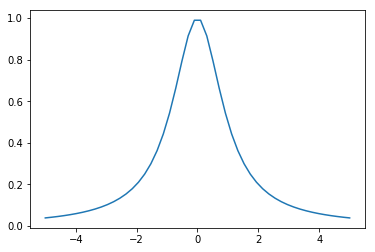

In [12]:
plt.plot(x1, 1/(1 + x1**2))

In [13]:
x2 = np.linspace(-1, 1)

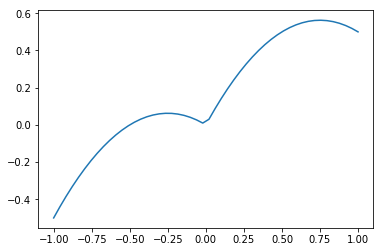

In [14]:
plt.plot(x, np.abs(x2) + x2/2 - x2**2)

In [16]:
def f(tip, x):
    if tip == "ex1":
        y = 1/(1 + x**2)
    else:
        y = np.abs(x) + x/2 - x ** 2
        
    return y

In [17]:
f1 = f("ex1", x1)

In [18]:
f2 = f("ex2", x2)

In [32]:
n = 10

In [49]:
2 * np.ones(n)

array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

In [63]:
A = np.diag(2* np.ones(n)) + np.diag(-np.ones(n - 1), k=-1) + np.diag(-np.ones(n-1), k=1); A

array([[ 2., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [-1.,  2., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0., -1.,  2., -1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0., -1.,  2., -1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0., -1.,  2., -1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0., -1.,  2., -1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0., -1.,  2., -1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0., -1.,  2., -1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  2., -1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  2.]])

In [50]:
v = np.linspace(1, 10)

In [52]:
np.linalg.norm(v, 1)

275.0

In [53]:
np.linalg.norm(v, 10)

11.851065174720505

In [54]:
np.linalg.norm(v, np.inf)

10.0

In [66]:
m, n= A.shape
S = 0

In [67]:
for i in range(1, m):
    for j in range(1, n):
        S = S + A[i, j] ** 2;
S = np.sqrt(S)

In [69]:
S

7.211102550927978

In [71]:
m, n = A.shape
S = 0
for i in range(1, m):
    S = S + np.sum(A[i, :] ** 2)
S = np.sqrt(S)
S

7.280109889280518

In [74]:
np.sqrt(np.sum(A**2))

7.615773105863909

In [80]:
from scipy.sparse import csr_matrix

In [215]:
csr_matrix(A)

<10x10 sparse matrix of type '<class 'numpy.float64'>'
	with 28 stored elements in Compressed Sparse Row format>

In [236]:
def taylor(x, n, tip):
    if tip == "sinus":
        s = 0
        for i in range(0, n):
            s = s + (-1) ** i * x ** (2 * i + 1) / np.math.factorial(2*i + 1)
    elif tip == "cosinus":
        s = 0
        for i in range(0 , n):
            s = s + (-1) ** i * x**(2 * i) / np.math.factorial(2 * i)
    elif tip == "exponential":
        s = 0
        for i in range(0, n):
            s = s + x ** i / np.math.factorial(i);
    return s

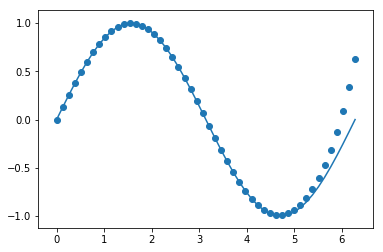

In [103]:
n = 7;
x1 = np.linspace(0, 2*np.pi)
plt.plot(x1, np.sin(x1))
plt.scatter(x1, taylor(x1, n, "sinus"))
plt.show()

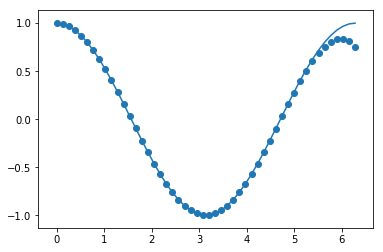

In [214]:
n=8
plt.plot(x1, np.cos(x1))
plt.scatter(x1, taylor(x1, n, "cosinus"))

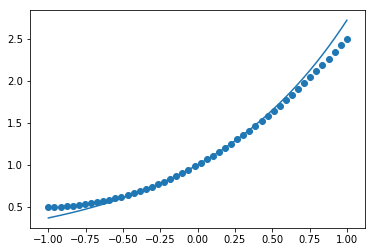

In [237]:
n = 3
x2 = np.linspace(-1, 1)
plt.plot(x2, np.exp(x2))
plt.scatter(x2, taylor(x2, n, "exponential"))

In [115]:
np.spacing(1) #eps

2.220446049250313e-16

In [120]:
2**-52

2.220446049250313e-16

In [135]:
np.finfo('d').max

1.7976931348623157e+308

In [133]:
v = np.array([7, 4, np.divide(1, 0), np.inf, np.inf]); v

C:\Users\Dan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


array([ 7.,  4., inf, inf, inf])

In [130]:
np.isinf(v)

array([False, False,  True,  True,  True])

In [136]:
(2 - 2 ** -52) * 2 ** 1023

1.7976931348623157e+308

In [139]:
np.multiply(2, 2 ** 1023)

179769313486231590772930519078902473361797697894230657273430081157732675805500963132708477322407536021120113879871393357658789768814416622492847430639474124377767893424865485276302219601246094119453082952085005768838150682342462881473913110540827237163350510684586298239947245938479716304835356329624224137216

In [143]:
b = 2
while 1 + b > 1:
    bold = b;
    b = b/ 2
bold

2.220446049250313e-16

In [219]:
def LagrangeClasic(z, x):
    n = x.shape[0]
    l = np.zeros((n, z.shape[0]))
    P = np.ones(n)
    N = np.ones(n)
    for k in range(1, z.shape[0]):
        for i in range(1, n):
            for j in range(1, n):
                if i!=j:
                    P[i] = P[i] * (x[i] - x[j])
                    N[i] = N[i] * (z[k] - x[j])
            l[i, k] = N[i] / P[i]

    return l

In [230]:
def PolLagrange():
    z = np.linspace(-2, 2)
    x = np.array([-2, -1, 0, 1, 2])
    l = LagrangeClasic(z, x)
    plt.plot(z, l[2,:])
    plt.plot(x, np.zeros(5))

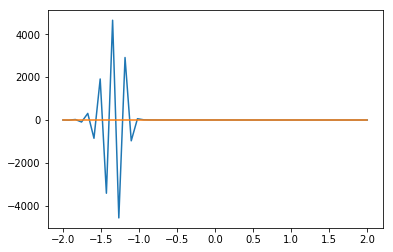

In [231]:
PolLagrange()

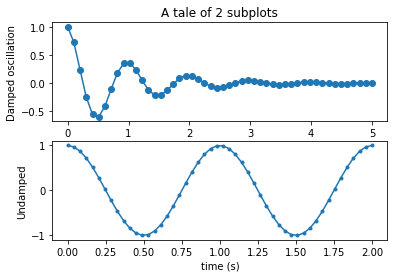

In [235]:
x1 = np.linspace(0.0, 5.0)
x2 = np.linspace(0.0, 2.0)

y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
y2 = np.cos(2 * np.pi * x2)

plt.subplot(2, 1, 1)
plt.plot(x1, y1, 'o-')
plt.title('A tale of 2 subplots')
plt.ylabel('Damped oscillation')

plt.subplot(2, 1, 2)
plt.plot(x2, y2, '.-')
plt.xlabel('time (s)')
plt.ylabel('Undamped')

plt.show()